In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import emoji

In [6]:
# Convert the 'spans' column from a string to a list of integers
df['spans'] = df['spans'].apply(lambda x: [int(i) for i in x.strip('[]').split(', ')])

# Access the 'text' and 'spans' columns
text_data = df['text']
span_data = df['spans']

NameError: name 'df' is not defined

In [7]:
ta_en_misogyny_train = pd.read_csv('./train/ta-en-misogyny-train.csv')#, encoding='ISO-8859-1')
ta_en_misogyny_train.head(5)

Comments              Label
0   enaku unmaikum aluha wantu thirunangaigal the...  None-of-the-above
1   superstar vijay dai arivuketta polu ithu thap...        Transphobic
2                       ugka smile cute a iruku       None-of-the-above
3                           anna i am waiting na      None-of-the-above
4   yanda tamilnadu la evvalavo pirachana iruku a...  None-of-the-above

<Axes: ylabel='Comments'>

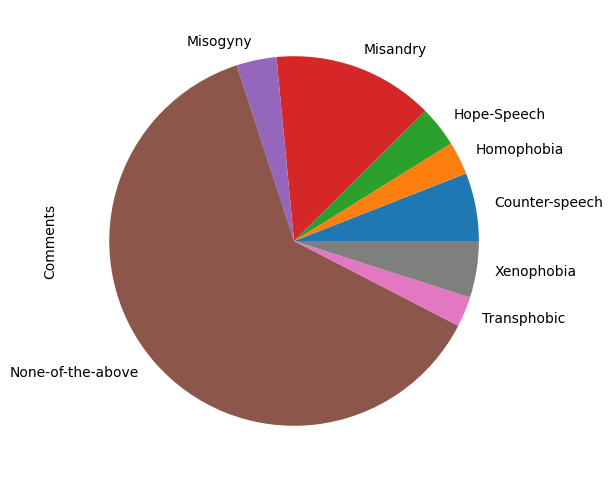

In [8]:
# visualize using PieChart
fig,axis=plt.subplots(figsize=(8,6))
ta_en_misogyny_train.groupby('Label')['Comments'].count().plot.pie(ax=axis)

In [9]:
def get_score(value):
    a = -1  # or any other default value that makes sense for your use case
    if(value == 'Transphobic'):
        a=0
    elif(value == 'Xenophobia'):
        a=1
    elif(value == 'Counter-speech'):
        a=2
    elif(value == 'Homophobia'):
        a=3
    elif(value == 'Hope-Speech'):
        a=4
    elif(value == 'Misogyny'):
        a=5 
    elif(value == 'Misandry'):
        a=6
    elif(value == 'None-of-the-above'):
        a=7
    return a
        

ta_en_misogyny_train['Label'] = ta_en_misogyny_train['Label'].map(get_score)
ta_en_misogyny_train.head(50)

Comments  Label
0    enaku unmaikum aluha wantu thirunangaigal the...      7
1    superstar vijay dai arivuketta polu ithu thap...      0
2                        ugka smile cute a iruku           7
3                            anna i am waiting na          7
4    yanda tamilnadu la evvalavo pirachana iruku a...      7
5    night fulla mater ku alaiuradhu day fulla pic...      0
6    l v  innum konja varshathula yaaru agadhi aah...      7
7    bala kumar  wat ur asking    st  olunga kealv...      7
8           unaku aids vandhuruchi pola olunga iru         7
9    pradeep  kodi per iruka maataanga nu nenaikir...      2
10   yena public la pesa pudikalaya  dei arivu ell...      6
11   h raja neenga peasunga   ivangaluku unagala p...      7
12        antha paiyyan straight  girl friend iruk...      3
13                 sivaprakasam selvi  meenu kutty         7
14                 bro    aaya kalaigal pathi solluga      7
15                  poda potta punda dhevudiya makane      6
16   rumba kastma iruku     oru public places poga...      7
17          all i can say is wow                           7
18   manickam anbu  ammaavai pathi pesurathu sari ...      2
19   tharan tamilanda  yanda sombu  ethuikku munna...      2
20   edho  its all but nu ennamo varum   sariya th...      7
21                                go s  one elder bro      7
22                    nama sff theriyum nenaikira bro      7
23   dei venna admin ithu karu palaniyappan ku ill...      6
24      intha transgender romba nallavangala irukanga      7
25                   excellent bro keep it up              7
26   yella brahmins yum ketta yennam ullavanga ill...      7
27                                                         7
28             sabarinath gnanakaran  apna number  do      7
29                         babu natarajan  i love you      7
30   best engineering works best engineering works...      7
31   mari eswari  mamaiyar marumaga sandai its hyp...      2
32                   yarupa nee engirunthu vanthaaaa       7
33   nee naan aval               ohh twins sa norm...      7
34   neengo nalla irkanum na unga family nalla irk...      7
35                        go to tamil gun or skytamil      7
36                             tmp army    heart pls       7
37        thala    neeye   ippovo appovo nu irukka...      6
38                      babu natarajan  hi i m bottom      7
39   enaku manithanum manasum than mukkiyam jathiy...      7
40                    karthi shiva  nan chennai macha      7
41   prabhu prabhu apo neenga sollunga len paapam ...      7
42   mahesh please da enala mudiyala en kita vada ...      7
43             madhavaraj madhavaraj  whatsapp va bro      7
44      harihara shankar  bro phone number varala bro      7
45             abilash abilash  hii ur watsapp number      7
46   idhula kodumanai ennana   pala poli thirunang...      6
47                             anbu s anbu  illaye ma      7
48   ivlo days ah kattuna build up lam intha lockd...      0
49        bro antha akka roomba varusam nalla valanum      7

In [10]:
def preprocess_text(text):

  if isinstance(text, str):

    print("Original Text:", text)

    # Remove HTML tags
    text = re.sub('<[^>]*>', ' ', text)
    #print("Text after removing HTML tags:", text)
    # Convert to lowercase
    text =  text.lower()
    #print("Converting to lowercase:", text)
    # regular expression to match URLs
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    #print("Text after removing regular expression to match URLs:", text)

    text = re.sub(r'\d+', ' ', text)
    #print("Text after removing digital:", text)

    # Combine words back into a single string
    preprocessed_text = ''.join(text)
    #print("Final pre-processed text:", preprocessed_text)
    return preprocessed_text
# Apply preprocessing to the 'text' column of the dataset
ta_en_misogyny_train['Comments'] = ta_en_misogyny_train['Comments'].apply(preprocess_text)
# Save cleaned dataset
ta_en_misogyny_train.head(55)

Original Text:  enaku unmaikum aluha wantu thirunangaigal theiwangal    
Original Text:  superstar vijay dai arivuketta polu ithu thappu pavam da amanda na gay relationship virukkuren  ethirkkiren
Original Text:  ugka smile cute a iruku     
Original Text:  anna i am waiting na    
Original Text:  yanda tamilnadu la evvalavo pirachana iruku athalam vittudu ethu oru pirachana vanthu kettu iruka
Original Text:  night fulla mater ku alaiuradhu day fulla pichaiku alaiuradhu idhula louds paaru potta p   a   
Original Text:  l v  innum konja varshathula yaaru agadhi aah sutha poradhunu therium thozhar   
Original Text:  bala kumar  wat ur asking    st  olunga kealviya kealunga 
Original Text:  unaku aids vandhuruchi pola olunga iru   
Original Text:  pradeep  kodi per iruka maataanga nu nenaikireengala  ellaarum ungala maadri aaluku bayandhutu open aa solla maatraanga  india la     crore la    crore lgbt thaan   aana adha open aa ellaarkitayum solradhu enna maadri konjam per thaan  
Original

Comments  Label
0    enaku unmaikum aluha wantu thirunangaigal the...      7
1    superstar vijay dai arivuketta polu ithu thap...      0
2                        ugka smile cute a iruku           7
3                            anna i am waiting na          7
4    yanda tamilnadu la evvalavo pirachana iruku a...      7
5    night fulla mater ku alaiuradhu day fulla pic...      0
6    l v  innum konja varshathula yaaru agadhi aah...      7
7    bala kumar  wat ur asking    st  olunga kealv...      7
8           unaku aids vandhuruchi pola olunga iru         7
9    pradeep  kodi per iruka maataanga nu nenaikir...      2
10   yena public la pesa pudikalaya  dei arivu ell...      6
11   h raja neenga peasunga   ivangaluku unagala p...      7
12        antha paiyyan straight  girl friend iruk...      3
13                 sivaprakasam selvi  meenu kutty         7
14                 bro    aaya kalaigal pathi solluga      7
15                  poda potta punda dhevudiya makane      6
16   rumba kastma iruku     oru public places poga...      7
17          all i can say is wow                           7
18   manickam anbu  ammaavai pathi pesurathu sari ...      2
19   tharan tamilanda  yanda sombu  ethuikku munna...      2
20   edho  its all but nu ennamo varum   sariya th...      7
21                                go s  one elder bro      7
22                    nama sff theriyum nenaikira bro      7
23   dei venna admin ithu karu palaniyappan ku ill...      6
24      intha transgender romba nallavangala irukanga      7
25                   excellent bro keep it up              7
26   yella brahmins yum ketta yennam ullavanga ill...      7
27                                                         7
28             sabarinath gnanakaran  apna number  do      7
29                         babu natarajan  i love you      7
30   best engineering works best engineering works...      7
31   mari eswari  mamaiyar marumaga sandai its hyp...      2
32                   yarupa nee engirunthu vanthaaaa       7
33   nee naan aval               ohh twins sa norm...      7
34   neengo nalla irkanum na unga family nalla irk...      7
35                        go to tamil gun or skytamil      7
36                             tmp army    heart pls       7
37        thala    neeye   ippovo appovo nu irukka...      6
38                      babu natarajan  hi i m bottom      7
39   enaku manithanum manasum than mukkiyam jathiy...      7
40                    karthi shiva  nan chennai macha      7
41   prabhu prabhu apo neenga sollunga len paapam ...      7
42   mahesh please da enala mudiyala en kita vada ...      7
43             madhavaraj madhavaraj  whatsapp va bro      7
44      harihara shankar  bro phone number varala bro      7
45             abilash abilash  hii ur watsapp number      7
46   idhula kodumanai ennana   pala poli thirunang...      6
47                             anbu s anbu  illaye ma      7
48   ivlo days ah kattuna build up lam intha lockd...      0
49        bro antha akka roomba varusam nalla valanum      7
50   h raja nai nee avan sunne uombda nai yanndoy ...      6
51   neenga panrathu nallathuthan bro bt p      nu...      7
52   yen ma aangaluku pesuren nu nenaikathinga    ...      7
53   anish  ayio   apdi solladheenga    adhukum na...      7
54   just stupids non sense just avoid these video...      7

In [11]:
def remove_punctuation(text):
    # Define the punctuation characters to remove
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    # Remove the punctuation characters from the text
    for punctuation in punctuations:
        text = text.replace(punctuation, "")
    return text
# Apply the function to the column containing emoji
ta_en_misogyny_train['Comments'] = ta_en_misogyny_train['Comments'].apply(remove_punctuation)

In [12]:
ta_en_misogyny_train.head(30)

Comments  Label
0    enaku unmaikum aluha wantu thirunangaigal the...      7
1    superstar vijay dai arivuketta polu ithu thap...      0
2                        ugka smile cute a iruku           7
3                            anna i am waiting na          7
4    yanda tamilnadu la evvalavo pirachana iruku a...      7
5    night fulla mater ku alaiuradhu day fulla pic...      0
6    l v  innum konja varshathula yaaru agadhi aah...      7
7    bala kumar  wat ur asking    st  olunga kealv...      7
8           unaku aids vandhuruchi pola olunga iru         7
9    pradeep  kodi per iruka maataanga nu nenaikir...      2
10   yena public la pesa pudikalaya  dei arivu ell...      6
11   h raja neenga peasunga   ivangaluku unagala p...      7
12        antha paiyyan straight  girl friend iruk...      3
13                 sivaprakasam selvi  meenu kutty         7
14                 bro    aaya kalaigal pathi solluga      7
15                  poda potta punda dhevudiya makane      6
16   rumba kastma iruku     oru public places poga...      7
17          all i can say is wow                           7
18   manickam anbu  ammaavai pathi pesurathu sari ...      2
19   tharan tamilanda  yanda sombu  ethuikku munna...      2
20   edho  its all but nu ennamo varum   sariya th...      7
21                                go s  one elder bro      7
22                    nama sff theriyum nenaikira bro      7
23   dei venna admin ithu karu palaniyappan ku ill...      6
24      intha transgender romba nallavangala irukanga      7
25                   excellent bro keep it up              7
26   yella brahmins yum ketta yennam ullavanga ill...      7
27                                                         7
28             sabarinath gnanakaran  apna number  do      7
29                         babu natarajan  i love you      7

In [13]:
ta_en_misogyny_train.isnull().sum()

Comments    0
Label       0
dtype: int64

In [14]:
 ta_en_misogyny_train.duplicated().sum()

8

In [15]:
ta_en_misogyny_train.drop_duplicates(inplace = True)

In [16]:
 ta_en_misogyny_train.duplicated().sum()

0

In [17]:
# Save cleaned train_dataset to CSV file
ta_en_misogyny_train.to_csv('./train/clean-ta-en-misogyny-train.csv', index=False)

In [18]:
clean_ta_en_misogyny_train = pd.read_csv('./train/clean-ta-en-misogyny-train.csv')#, encoding='ISO-8859-1')

In [19]:
clean_ta_en_misogyny_train.head()

Comments  Label
0   enaku unmaikum aluha wantu thirunangaigal the...      7
1   superstar vijay dai arivuketta polu ithu thap...      0
2                       ugka smile cute a iruku           7
3                           anna i am waiting na          7
4   yanda tamilnadu la evvalavo pirachana iruku a...      7

In [20]:
telugu_hate_speech_train = pd.read_csv('./train/telugu-hate-speech-train.csv')#, encoding='ISO-8859-1')
telugu_hate_speech_train.head(50)

Comments     Label
0   Thappu chesina vaallaku vanike kaadu inka anni...      hate
1   Dhusta chaathuryam!  Meeru ilantivi enni chesi...      hate
2   Vetakaram super. Govt ki siggu seram radu. End...      hate
3   Only rajakiyam ga vadukovatanike ee dharidrapu...      hate
4          Katam hogaya narayana pedda bokada college      hate
5   TELUGU DESAM PARTY ONLY GOOD ADMINISTRATION IN...  non-hate
6   Nenu aite Jabardast show chudadam manesanu TV ...  non-hate
7   Jagan meeda jaganke visvasam ledu anduke ea lo...      hate
8                       Students tho adukovtam thappu  non-hate
9   Srinivasa gaaru endukee panikamaalina debate.....      hate
10  Meru mi media published cheyadam vallane elant...  non-hate
11       One of the Great Leader, A Big Salute Sir.,,  non-hate
12  Mogavalla face luu mathram manchiga chupisthar...      hate
13                                Paniki malina chana      hate
14  Rosayya garu is a real, Good and true politici...  non-hate
15                         Telangana gujju gulam kadu      hate
16                               Disevulera mundamopi      hate
17  Anta manchi job chestu govt ki tala vanchi bra...      hate
18                     Down To Earth Man Rosaiah Garu  non-hate
19                              Jagan is unstoppable   non-hate
20  RK eagerly waiting to demoralise Jagan, that i...      hate
21                                 Vedi nathinakodaka      hate
22          Vizag News reporter overaction chestunadu      hate
23  Revanth Reddy garu has very clarity in his tho...  non-hate
24                          Mahesh smile ...pure soul  non-hate
25                              Kanipinche devudu CBN  non-hate
26  Die hard fan frm Kerala  Nenu choosina pedha a...  non-hate
27          Anna....Nee lanti vaale kavali .... TDPki  non-hate
28            Babulake Baabu Super star Mahesh Baabu   non-hate
29  Jai Pawan Kalyan Garu. Pawan Ji in Andhra and ...  non-hate
30               Sir ycp ki balle gunapam dimputunavu      hate
31  Harish Rao garu adiginatlu, Kaleswaram project...  non-hate
32  Gounu leduga anduke intlo tongunnadu bayataki ...      hate
33  Pavan Kalyan gari nayakatvam vardillali jai po...  non-hate
34     Sagam kaalchina chutta peekalaku brand amsador      hate
35           Bjp central lo vachi yemi chesinru chepu      hate
36           PK navu janmmalo ward member kuda Kaledu      hate
37  Lancham antunaru anam garu...... inthaku mundu...      hate
38  Jagan eppatiki CM avvaledu raasi pettukoo....h...      hate
39  Kirrak movie cinema gurinchi bad ga anakandi j...  non-hate
40                             Ka pal garu miru super  non-hate
41  Hehe mla kuda gelavaledu kanisam gurtu kuda le...      hate
42                        No 1 loafer. Jai TDP-Lokesh      hate
43  Asalu ka paul time ivvakudadhu amitashaku andh...  non-hate
44                  Vammo mamulodivi kadu swamy Nuvvu  non-hate
45                           Manalli yavadu ra apeddi  non-hate
46                              Poraaa..Red Flower...      hate
47  He has more talking power Aina daivajanulato a...  non-hate
48  Mahesh babu nilabadithe chalu memu chusathsam ...  non-hate
49        Idira pual power anty ippudina telusukondra  non-hate

<Axes: ylabel='Comments'>

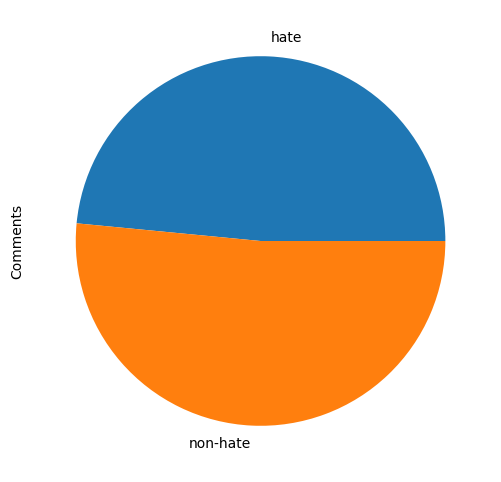

In [21]:
# visualize using PieChart
fig,axis=plt.subplots(figsize=(8,6))
telugu_hate_speech_train.groupby('Label')['Comments'].count().plot.pie(ax=axis)

In [22]:
def get_score(value):
    a = -1  # or any other default value that makes sense for your use case
    if(value == 'non-hate'):
        a=0
    elif(value == 'hate'):
        a=1
    return a
        

telugu_hate_speech_train['Label'] = telugu_hate_speech_train['Label'].map(get_score)
telugu_hate_speech_train.head(50)

Comments  Label
0   Thappu chesina vaallaku vanike kaadu inka anni...      1
1   Dhusta chaathuryam!  Meeru ilantivi enni chesi...      1
2   Vetakaram super. Govt ki siggu seram radu. End...      1
3   Only rajakiyam ga vadukovatanike ee dharidrapu...      1
4          Katam hogaya narayana pedda bokada college      1
5   TELUGU DESAM PARTY ONLY GOOD ADMINISTRATION IN...      0
6   Nenu aite Jabardast show chudadam manesanu TV ...      0
7   Jagan meeda jaganke visvasam ledu anduke ea lo...      1
8                       Students tho adukovtam thappu      0
9   Srinivasa gaaru endukee panikamaalina debate.....      1
10  Meru mi media published cheyadam vallane elant...      0
11       One of the Great Leader, A Big Salute Sir.,,      0
12  Mogavalla face luu mathram manchiga chupisthar...      1
13                                Paniki malina chana      1
14  Rosayya garu is a real, Good and true politici...      0
15                         Telangana gujju gulam kadu      1
16                               Disevulera mundamopi      1
17  Anta manchi job chestu govt ki tala vanchi bra...      1
18                     Down To Earth Man Rosaiah Garu      0
19                              Jagan is unstoppable       0
20  RK eagerly waiting to demoralise Jagan, that i...      1
21                                 Vedi nathinakodaka      1
22          Vizag News reporter overaction chestunadu      1
23  Revanth Reddy garu has very clarity in his tho...      0
24                          Mahesh smile ...pure soul      0
25                              Kanipinche devudu CBN      0
26  Die hard fan frm Kerala  Nenu choosina pedha a...      0
27          Anna....Nee lanti vaale kavali .... TDPki      0
28            Babulake Baabu Super star Mahesh Baabu       0
29  Jai Pawan Kalyan Garu. Pawan Ji in Andhra and ...      0
30               Sir ycp ki balle gunapam dimputunavu      1
31  Harish Rao garu adiginatlu, Kaleswaram project...      0
32  Gounu leduga anduke intlo tongunnadu bayataki ...      1
33  Pavan Kalyan gari nayakatvam vardillali jai po...      0
34     Sagam kaalchina chutta peekalaku brand amsador      1
35           Bjp central lo vachi yemi chesinru chepu      1
36           PK navu janmmalo ward member kuda Kaledu      1
37  Lancham antunaru anam garu...... inthaku mundu...      1
38  Jagan eppatiki CM avvaledu raasi pettukoo....h...      1
39  Kirrak movie cinema gurinchi bad ga anakandi j...      0
40                             Ka pal garu miru super      0
41  Hehe mla kuda gelavaledu kanisam gurtu kuda le...      1
42                        No 1 loafer. Jai TDP-Lokesh      1
43  Asalu ka paul time ivvakudadhu amitashaku andh...      0
44                  Vammo mamulodivi kadu swamy Nuvvu      0
45                           Manalli yavadu ra apeddi      0
46                              Poraaa..Red Flower...      1
47  He has more talking power Aina daivajanulato a...      0
48  Mahesh babu nilabadithe chalu memu chusathsam ...      0
49        Idira pual power anty ippudina telusukondra      0

In [23]:
telugu_hate_speech_train['Comments'] = telugu_hate_speech_train['Comments'].apply(preprocess_text)
telugu_hate_speech_train['Comments'] = telugu_hate_speech_train['Comments'].apply(remove_punctuation)

Original Text: Thappu chesina vaallaku vanike kaadu inka anni modalithavi  . Enta kaalam students life tho aadukuntu crores earn chedtharu illegal ga.
Original Text: Dhusta chaathuryam!  Meeru ilantivi enni chesina em pikalerra!
Original Text: Vetakaram super. Govt ki siggu seram radu. Endukante siggu seram manushulaku mathrme vuntundani na abiprayam.
Original Text: Only rajakiyam ga vadukovatanike ee dharidrapu arestlu
Original Text: Katam hogaya narayana pedda bokada college
Original Text: TELUGU DESAM PARTY ONLY GOOD ADMINISTRATION IN THE WORLD
Original Text: Nenu aite Jabardast show chudadam manesanu TV 5 ABN channels lo debates vchinaka 
Original Text: Jagan meeda jaganke visvasam ledu anduke ea loffer panulu
Original Text: Students tho adukovtam thappu
Original Text: Srinivasa gaaru endukee panikamaalina debate... Aa sambaki paniledu... Meeku jeetam kavaali ..makenti gola... Anni exams happy ga jariginai... problem meeu creat cheyyavaddu
Original Text: Meru mi media published che

In [24]:
telugu_hate_speech_train.isnull().sum()

Comments    0
Label       0
dtype: int64

In [25]:
 telugu_hate_speech_train.duplicated().sum()

46

In [26]:
telugu_hate_speech_train.drop_duplicates(inplace = True)

In [27]:
 telugu_hate_speech_train.duplicated().sum()

0

In [28]:
# Save cleaned train_dataset to CSV file
telugu_hate_speech_train.to_csv('./train/clean-telugu-hate-speech-train.csv', index=False)
clean_telugu_hate_speech_train = pd.read_csv('./train/clean-telugu-hate-speech-train.csv')#, encoding='ISO-8859-1')

In [29]:
clean_telugu_hate_speech_train.head(50)

Comments  Label
0   thappu chesina vaallaku vanike kaadu inka anni...      1
1   dhusta chaathuryam  meeru ilantivi enni chesin...      1
2   vetakaram super govt ki siggu seram radu enduk...      1
3   only rajakiyam ga vadukovatanike ee dharidrapu...      1
4          katam hogaya narayana pedda bokada college      1
5   telugu desam party only good administration in...      0
6   nenu aite jabardast show chudadam manesanu tv ...      0
7   jagan meeda jaganke visvasam ledu anduke ea lo...      1
8                       students tho adukovtam thappu      0
9   srinivasa gaaru endukee panikamaalina debate a...      1
10  meru mi media published cheyadam vallane elant...      0
11           one of the great leader a big salute sir      0
12  mogavalla face luu mathram manchiga chupisthar...      1
13                                paniki malina chana      1
14  rosayya garu is a real good and true politicia...      0
15                         telangana gujju gulam kadu      1
16                               disevulera mundamopi      1
17  anta manchi job chestu govt ki tala vanchi bra...      1
18                     down to earth man rosaiah garu      0
19                              jagan is unstoppable       0
20  rk eagerly waiting to demoralise jagan that is...      1
21                                 vedi nathinakodaka      1
22          vizag news reporter overaction chestunadu      1
23  revanth reddy garu has very clarity in his tho...      0
24                             mahesh smile pure soul      0
25                              kanipinche devudu cbn      0
26  die hard fan frm kerala  nenu choosina pedha a...      0
27                  annanee lanti vaale kavali  tdpki      0
28            babulake baabu super star mahesh baabu       0
29  jai pawan kalyan garu pawan ji in andhra and m...      0
30               sir ycp ki balle gunapam dimputunavu      1
31  harish rao garu adiginatlu kaleswaram project ...      0
32  gounu leduga anduke intlo tongunnadu bayataki ...      1
33  pavan kalyan gari nayakatvam vardillali jai po...      0
34     sagam kaalchina chutta peekalaku brand amsador      1
35           bjp central lo vachi yemi chesinru chepu      1
36           pk navu janmmalo ward member kuda kaledu      1
37  lancham antunaru anam garu inthaku mundu your ...      1
38       jagan eppatiki cm avvaledu raasi pettukooha       1
39  kirrak movie cinema gurinchi bad ga anakandi j...      0
40                             ka pal garu miru super      0
41  hehe mla kuda gelavaledu kanisam gurtu kuda le...      1
42                          no   loafer jai tdplokesh      1
43  asalu ka paul time ivvakudadhu amitashaku andh...      0
44                  vammo mamulodivi kadu swamy nuvvu      0
45                           manalli yavadu ra apeddi      0
46                                   poraaared flower      1
47  he has more talking power aina daivajanulato a...      0
48  mahesh babu nilabadithe chalu memu chusathsam ...      0
49        idira pual power anty ippudina telusukondra      0

In [30]:
ta_misogyny_train = pd.read_csv('./train/ta-misogyny-train.csv')#, encoding='ISO-8859-1')
ta_misogyny_train.head(50)


Comments              Label
0   \tроЙроЩрпНроХро│рпН рокрпЗроЪрпНроЪрпИ роОродро┐ро░рпНрокро╛ро░рпНродрпНродрпЗройрпН. роиро▓рпНро▓ ро╡ро┐ро│роХрпНроХроорпН...        Hope-Speech
1   \tроОроЪрпН. ро░ро╛роЪро╛ро╡ро╛ро▓рпН роЗро░ро╛рооро░рпБроХрпНроХрпЗ  роЗро┤ро┐ро╡рпБ. роЗро╡ро░рпН роОро▓рпНро▓ро╛роо...  None-of-the-above
2   \tроХро▓рпНропро╛рогроорпНройрпБ  ро╡ро░рпБроорпНрокрпЛродрпБ родро╛ройрпН роЪро╛родро┐ роорпБроХрпНроХро┐ропроорпН роОроЩ...  None-of-the-above
3                \tTentu Kottai роРропро╛ роиро╛ройрпН родрооро┐ро┤рпН роЗроирпНродрпБ.  None-of-the-above
4   \tTamil selvan  роЕроЯрпЗ родрпЗро╡роЯро┐ропро╛ро╡рпБроХрпНроХрпБ рокро┐ро░роирпНродро╡ройрпЗ рокроЪ...         Homophobia
5   \tbro роирпАроЩрпНроХ рокрпЗроЪро▒родрпЖро▓рпНро▓ро╛роорпН роХрпЗроХрпНроХ роХрпЗроХрпНроХ роЗро░ро╡рпБ родрпБроХрпН...  None-of-the-above
6   \tS_  B_  Narmada.D┬а рокрпЖро▒рпНро▒ рокро┐ро│рпНро│рпИропрпИ рокроЯро┐роХрпНроХ ро╡рпИрод...  None-of-the-above
7   \tрокро╛роЬроХ рооро▒рпНро▒рпБроорпН роЕродрпБ роЪро╛ро░рпНроирпНрод роЕроорпИрокрпНрокрпБроХро│рпН роЗроирпНродрпБ рооро▒...  None-of-the-above
8                           \tродрпЗро╡ро┐роЯро┐ропро╛; рокропро╛  H   Raja           Misandry
9   \t+рокро┐ро░рокро▓ роиро╛роЯрпНроЯро╛роорпИ роОройрпН ро╡рпАроЯрпНроЯрпБроХрпНроХрпБ ро╡ро╛ роЪрпБрогрпНрогро┐ роКроорпН...         Homophobia
10                  \tро░роХрпБро░ро╛роорпН ро░ро╛роЬройрпН роирпЗро░рпНроорпИропро╛рой рооройро┐родро░рпН.  None-of-the-above
11  \tродро┐ро░рпБ.роЖройроирпНрод роЪрпАройро┐ро╡ро╛роЪройрпН роЕро╡ро░рпНроХро│рпН роЪро┐ро▒роирпНрод рооройро┐родро░рпН O...  None-of-the-above
12            \tрокро╛ро░рокроЯрпНроЪроорпН родро╛рогрпН роЕродро┐ро▓рпН роОройрпНрой роЪроирпНродрпЗроХроорпН???  None-of-the-above
13  \tроирпАроЪрпНроЪро▓рпН роХрпБро│ рооро░рогроорпН | роЬрпЖропро▓ро▓ро┐родро╛ро╡ро╛ро▓рпН родрокрпНрокро┐ропродрпБ PS...  None-of-the-above
14  \tроОро╡ройрпНроЯро╛ роирпА роХрпЗро╡ро▓рооро╛рой роИройрокрпНрокро┐ро▒ро╡ро┐ ..роХрпЗроЯрпБроХрпЖроЯрпНроЯ роХрпЗройрок...           Misandry
15  \tроЪройро╛родро╛рой родро░рпНроородрпНродрпБроХрпНроХрпБ родро╛ройрпН родрооро┐ро┤ро░рпНроХро│рпН роОродро┐ро░ро┐.роЗроирпН...  None-of-the-above
16  \tроородрпБро╡роирпНродро┐ ... рокро┐ро░ро╛роорог роХрпБро▓родрпНродро┐ройрпН роЪро╛рокроХрпНроХрпЗроЯрпБ ! .....  None-of-the-above
17            \tроЗро╡ройрпБроорпН рокро┐ро░ро╛роорогро░рпН роЬро╛родро┐роХрпНроХрпБ ро╡рпЖроЯрпНроХроХрпНроХрпЗроЯрпБ.  None-of-the-above
18  \tро╡рпИро░роорпБродрпНродрпБ роЕро╡ро░рпНроХро│рпН ро╡ро╛ропрпИ роорпВроЯро┐роХрпНроХрпКрогрпНроЯрпБ роЗро░рпБроирпНродро┐ро░...     Counter-speech
19                           \tрокропро┐родрпНродро┐ропро╛роорпН роЗроирпНрод роОроЪрпНроЪро╛  None-of-the-above
20                   \tродрооро┐ро┤рпН роиро╛роЯрпБ роЙройроХрпНроХрпБ роЪрпЛро▒рпБ рокрпЛроЯрпБ родрпБ  None-of-the-above
21  \tро░ро╛роЬро╛ роОродро▒рпНроХро╛роХ рооро▒рпНро▒ роородродрпНродро┐ройро░рпИ рокрпЗроЪрпБроХро┐ро▒ро╛ройрпН.... роЗ...           Misandry
22                                      \t; родрооро┐ро┤ро░рпНроХро│рпЗ  None-of-the-above
23                       \tроЙрогрпН роЕроорпНрооро╛ родрпЛро╡ро┐роЯро┐ропро╛ рокрпБрогроЯроорпЛрой           Misogyny
24             \tPrestha Maavan ; роирогрпНрокро░рпЗ!! роХройроЯро╛ро╡ро┐ро▓рпБроорпН  None-of-the-above
25  \tроироорпНроотАМ рокрпБро░рпБро╖рпН  родро╛ройрпН роЕрокрпНрокроЯро┐ройрпБ роиро┐ройрпИроЪрпНроЪрпЛроорпН рокро░ро╡ро╛роп...  None-of-the-above
26                                   \tроЕрокрпНрокрпЛ роЪройрпН роЯро┐ро╡ро┐  None-of-the-above
27  \teliyathamby kuncharalingam ; роиро▓рпНро▓ро╡ро┐родрооро╛роХрокрпН рокрпЛ...  None-of-the-above
28      \tро╕рпНро░рпА A┬а face_with_rolling_eyesthinking_face  None-of-the-above
29                   \tроПройрпН роиро╛ропрпН рооро╛родро┐ро░ро┐ роХродрпНродрпБро▒ро╛рогрпН роОроЪрпНроЪ  None-of-the-above
30  \tроЕрокрпНрокроЯро┐ропрпЗ роОро▓рпНро▓ро╛ро░рпБроорпН роЪрпЖродрпНрод рокро┐ро▒роХрпБ ропро╛ро░рпН рооро┐роЪрпН

<Axes: ylabel='Comments'>

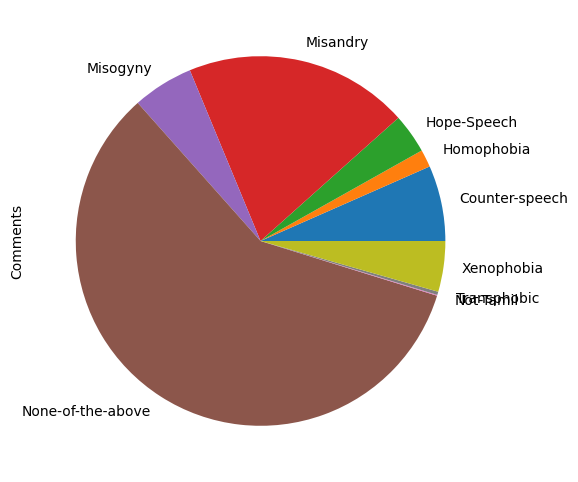

In [31]:
# visualize using PieChart
fig,axis=plt.subplots(figsize=(8,6))
ta_misogyny_train.groupby('Label')['Comments'].count().plot.pie(ax=axis)

In [32]:
def get_score(value):
    a = -1  # or any other default value that makes sense for your use case
    if(value == 'Transphobic'):
        a=0
    elif(value == 'Xenophobia'):
        a=1
    elif(value == 'Counter-speech'):
        a=2
    elif(value == 'Homophobia'):
        a=3
    elif(value == 'Hope-Speech'):
        a=4
    elif(value == 'Misogyny'):
        a=5 
    elif(value == 'Misandry'):
        a=6
    elif(value == 'None-of-the-above'):
        a=7
    return a
        

ta_misogyny_train['Label'] = ta_misogyny_train['Label'].map(get_score)
ta_misogyny_train.head()

Comments  Label
0  \tроЙроЩрпНроХро│рпН рокрпЗроЪрпНроЪрпИ роОродро┐ро░рпНрокро╛ро░рпНродрпНродрпЗройрпН. роиро▓рпНро▓ ро╡ро┐ро│роХрпНроХроорпН...      4
1  \tроОроЪрпН. ро░ро╛роЪро╛ро╡ро╛ро▓рпН роЗро░ро╛рооро░рпБроХрпНроХрпЗ  роЗро┤ро┐ро╡рпБ. роЗро╡ро░рпН роОро▓рпНро▓ро╛роо...      7
2  \tроХро▓рпНропро╛рогроорпНройрпБ  ро╡ро░рпБроорпНрокрпЛродрпБ родро╛ройрпН роЪро╛родро┐ роорпБроХрпНроХро┐ропроорпН роОроЩ...      7
3               \tTentu Kottai роРропро╛ роиро╛ройрпН родрооро┐ро┤рпН роЗроирпНродрпБ.      7
4  \tTamil selvan  роЕроЯрпЗ родрпЗро╡роЯро┐ропро╛ро╡рпБроХрпНроХрпБ рокро┐ро░роирпНродро╡ройрпЗ рокроЪ...      3

In [33]:
ta_misogyny_train['Comments'] = ta_misogyny_train['Comments'].apply(preprocess_text)
ta_misogyny_train['Comments'] = ta_misogyny_train['Comments'].apply(remove_punctuation)

Original Text: 	роЙроЩрпНроХро│рпН рокрпЗроЪрпНроЪрпИ роОродро┐ро░рпНрокро╛ро░рпНродрпНродрпЗройрпН. роиро▓рпНро▓ ро╡ро┐ро│роХрпНроХроорпН  роЕро░рпБроорпИ.  роиро┐ропро╛ропрооро╛рой роорпБро▒рпИропро┐ро▓рпН рокродро┐ро╡рпБ роЪрпЖропрпНродрпБро│рпНро│рпАро░рпНроХро│рпН.  роирпАрогрпНроЯ роХро╛ро▓роорпН ро╡ро╛ро┤рпНро╡родро▒рпНроХрпБ ро╡ро╛ро┤рпНродрпНродрпБроХрпНроХро│рпН.
Original Text: 	роОроЪрпН. ро░ро╛роЪро╛ро╡ро╛ро▓рпН роЗро░ро╛рооро░рпБроХрпНроХрпЗ  роЗро┤ро┐ро╡рпБ. роЗро╡ро░рпН роОро▓рпНро▓ро╛роорпН роЗро░ро╛рооро░рпН рокро░роорпНрокро░рпИропро╛роорпН.
Original Text: 	роХро▓рпНропро╛рогроорпНройрпБ  ро╡ро░рпБроорпНрокрпЛродрпБ родро╛ройрпН роЪро╛родро┐ роорпБроХрпНроХро┐ропроорпН роОроЩрпНроХро│рпБроХрпНроХрпБ
Original Text: 	Tentu Kottai роРропро╛ роиро╛ройрпН родрооро┐ро┤рпН роЗроирпНродрпБ.
Original Text: 	Tamil selvan  роЕроЯрпЗ родрпЗро╡роЯро┐ропро╛ро╡рпБроХрпНроХрпБ рокро┐ро░роирпНродро╡ройрпЗ рокроЪрпНроЪродрпН родрпЗро╡роЯро┐ропро╛ро╡рпБроХрпНроХрпБ рокро┐ро░роирпНродро╡

In [34]:
ta_misogyny_train.isnull().sum()

Comments    0
Label       0
dtype: int64

In [35]:
ta_misogyny_train.duplicated().sum()

3

In [36]:
ta_misogyny_train.drop_duplicates(inplace = True)

In [37]:
ta_misogyny_train.duplicated().sum()

0

In [38]:
# Save cleaned train_dataset to CSV file
ta_misogyny_train.to_csv('./train/clean-ta-misogyny-train.csv', index=False)
clean_ta_misogyny_train = pd.read_csv('./train/clean-ta-misogyny-train.csv')#, encoding='ISO-8859-1')

In [39]:
clean_ta_misogyny_train.head()

Comments  Label
0  \tроЙроЩрпНроХро│рпН рокрпЗроЪрпНроЪрпИ роОродро┐ро░рпНрокро╛ро░рпНродрпНродрпЗройрпН роиро▓рпНро▓ ро╡ро┐ро│роХрпНроХроорпН ...      4
1  \tроОроЪрпН ро░ро╛роЪро╛ро╡ро╛ро▓рпН роЗро░ро╛рооро░рпБроХрпНроХрпЗ  роЗро┤ро┐ро╡рпБ роЗро╡ро░рпН роОро▓рпНро▓ро╛роорпН ...      7
2  \tроХро▓рпНропро╛рогроорпНройрпБ  ро╡ро░рпБроорпНрокрпЛродрпБ родро╛ройрпН роЪро╛родро┐ роорпБроХрпНроХро┐ропроорпН роОроЩ...      7
3                \ttentu kottai роРропро╛ роиро╛ройрпН родрооро┐ро┤рпН роЗроирпНродрпБ      7
4  \ttamil selvan  роЕроЯрпЗ родрпЗро╡роЯро┐ропро╛ро╡рпБроХрпНроХрпБ рокро┐ро░роирпНродро╡ройрпЗ рокроЪ...      3

##### Clean Test Data

In [40]:
#Load sen_tam_test_without_labels data
ta_en_test_without_labels = pd.read_csv('./tst/ta-en_test_without_labels.csv')#, encoding='ISO-8859-1')
ta_en_test_without_labels.head()

ante peddi yedukkure ponnai vacci panam sambatikkuraange
0  Yella idangalilum pengalai asinga paduthuvathe...      
1  Pannikku porandha paradhesi H Raja... Ponna pu...      
2  Ayya white T-shirt! Tamil culture pathi mulusa...      
3                   Madu vandhi  bjb fraudulent lady      
4  рокрпБро░роЯрпНроЪро┐ропро╛ро│ройрпН роЪрпБрокро╛┬а deiii sarakku midukku nnu p...

In [41]:
# Rename the column 'old_column_name' to 'new_column_name'
ta_en_test_without_labels = ta_en_test_without_labels.rename(columns={'ante peddi yedukkure ponnai vacci panam sambatikkuraange': 'Comments'})

In [42]:
def replace_emoji(text):
    return emoji.demojize(text, delimiters=('', ''))
# Apply the function to the column containing emoji
ta_en_test_without_labels['Comments'] = ta_en_test_without_labels['Comments'].apply(replace_emoji)

In [43]:
# Preprocess sen_tam_test_without_labels data
ta_en_test_without_labels['Comments'] = ta_en_test_without_labels['Comments'].apply(preprocess_text)
ta_en_test_without_labels['Comments'] = ta_en_test_without_labels['Comments'].apply(replace_emoji)
ta_en_test_without_labels['Comments'] = ta_en_test_without_labels['Comments'].apply(remove_punctuation)

Original Text: Yella idangalilum pengalai asinga paduthuvathey hiv velaya irukku
Original Text: Pannikku porandha paradhesi H Raja... Ponna pundaiyaandi
Original Text: Ayya white T-shirt! Tamil culture pathi mulusa padichitu pesunga ji!
Original Text: Madu vandhi  bjb fraudulent lady
Original Text: рокрпБро░роЯрпНроЪро┐ропро╛ро│ройрпН роЪрпБрокро╛┬а deiii sarakku midukku nnu pesnadhu naangala ila neenglada potta baadu...
Original Text: Siva Kumar A┬а u r nos send pana bro
Original Text: H.raja punda nakkula Yar irukka
Original Text: Dravida kazigham periyar  story
Original Text: Ivangale paathaa mathippaa irukk naan paarthathilaye romba azhagaana person manass ivanga thaa nnu manasaara solgiren
Original Text: El TIGER┬а unaku epdi oru ponu mela attraction eruko andha Mari avangaluku same sex mela attraction eruku edha purinja theriyala na sagu
Original Text: Ramesh Selvaraj┬а neega entha ooru
Original Text: Ivanla Oru alu Ivana pathi pesa kuda kudathu
Original Text: Neega full ah parun

In [44]:
ta_en_test_without_labels.head(50)

Comments
0   yella idangalilum pengalai asinga paduthuvathe...
1   pannikku porandha paradhesi h raja ponna punda...
2   ayya white tshirt tamil culture pathi mulusa p...
3                    madu vandhi  bjb fraudulent lady
4   рокрпБро░роЯрпНроЪро┐ропро╛ро│ройрпН роЪрпБрокро╛┬а deiii sarakku midukku nnu p...
5                 siva kumar a┬а u r nos send pana bro
6                      hraja punda nakkula yar irukka
7                     dravida kazigham periyar  story
8   ivangale paathaa mathippaa irukk naan paarthat...
9   el tiger┬а unaku epdi oru ponu mela attraction ...
10                  ramesh selvaraj┬а neega entha ooru
11       ivanla oru alu ivana pathi pesa kuda kudathu
12  neega full ah parunga avangalukaga matumey idh...
13  ramrudhra official┬а its k bro ungaluku inni el...
14    ponnuka kuda pesa paya padarathu  kids   pon...
15               ayoo mudyala lussu mathyri yocikatha
16  police dvd pasangaluku ithuellam kannuku theri...
17  ivar  kalukku  vealai  seivatharkku  paerichi ...
18  ada chi saniyane po mental koodhi aambalaimga ...
19  mohideen asher┬а rollingonthefloorlaughingfacew...
20  enakku intha video va paakupothu sujith nyabag...
21  back la voice kuduthathu yaaru sema editingfac...
22                            if u r free just msg me
23  anna neenga oru reply pannunga pls  foldedhand...
24                          deepak h will u marry her
25           sornam lakshmi┬а mudiyathu d mooditu po d
26  yenda naya un jathi karan vedaikura sappadu un...
27                      crown king transgender ah nee
28                   anraiku oodagam  oomayanathu yen
29  bro etha vida merina beach la poi paruga thaga...
30    intha sun glass kallatu na oullunga pesuvingalo
31                    karthik karthik┬а karthik tel me
32  suganya prakash enda thevidiya payya ootha unn...
33  yarukuna oru help na boy and girl vara mattaga...
34        its very wrong culturekae kaedaana kaariyam
35  sariyaga than solli irukkar virunthalikku pora...
36              ivngala mathiri ala summa vidakuda du
37           world health  ena ilukara ara kora nayae
38    daii seeman poundanithanivairamuthu da kekkanum
39                                bro gr na aenna bro
40  ena di periya pudingi maathiri pesura adingu o...
41  swathi sankarraj┬а athuvum husband samatham iru...
42           ani anitha┬а   languages sollu di роОройрпНрой ройрпБ
43  ama evala allathu avana pathalaa dp vantha mat...
44  hey rajasaathikitu kelambu leftla vita rightla...
45  narambu thalarchi ungaluku irukunu  nanaikiran...
46  ading  naathari avar oru side ninna unakenna p...
47  college ku tuition a  endha oorla da  clg ku d...
48  sirikka veppinganu vantha alavechuttinga anywa...
49  nan  en manaivi sollathan kekkukiren i love my...

In [45]:
# Save cleaned train_dataset to CSV file
ta_en_test_without_labels.to_csv('./tst/clean-ta-en_test_without_labels.csv', index=False)

In [46]:
#Load  data
tamil_test_without_labels = pd.read_csv('./tst/tamil_test_without_labels.csv')#, encoding='ISO-8859-1')
tamil_test_without_labels.head()

роЕроирпНрод родрооро┐ро┤ройрпН роТро░рпБ роЪро╛родро┐ро╡рпЖро▒ро┐
0  роЗроирпНрод ро╡роирпНродрпЗро░ро┐роХрпНроХрпБ родроХрпБроирпНрод рокро╛роЯроорпН роХро▒рпНрокро┐рокрпНрокро╛ро░рпНроХро│рпН род...
1            роОроЪрпНроЪ ро░ро╛роЬро╛ роирпА роТро░рпБ рооро╛ройроЩрпНроХрпЖроЯрпНроЯ родро╛ропрпИ ро╡ро┐роЯ роирпА
2  рокрогроорпН роЗро░рпБроХрпНроХрпБроорпН роЗроЯродрпНродро┐ро▓рпН роХрпЗроЯрпНрокродрпБ родро╡ро▒рпБ  роЗро▓рпНро▓рпИ рокрог...
3  роЪроХ родрпЛро┤ро┐ропро╛роХ роиро┐ройрпИродрпНродрпБ роЖродро░ро╡рпБ родро╛ро░рпБроЩрпНроХро│рпН роирогрпНрокро░рпНроХро│рпЗ!...
4  рокро▓ роиро▓рпНро▓ роХро░рпБродрпНродрпБроХрпНроХро│рпИ роЪрпКройрпНрой родро┐ро░рпБро╡ро│рпНро│рпБро╡ро░рпН  роХрогро╡ройрпН...

In [47]:
# Rename the column 'old_column_name' to 'new_column_name'
tamil_test_without_labels = tamil_test_without_labels.rename(columns={'роЕроирпНрод родрооро┐ро┤ройрпН роТро░рпБ роЪро╛родро┐ро╡рпЖро▒ро┐': 'Comments'})

In [48]:
def replace_emoji(text):
    return emoji.demojize(text, delimiters=('', ''))
# Apply the function to the column containing emoji
tamil_test_without_labels['Comments'] = tamil_test_without_labels['Comments'].apply(replace_emoji)

In [49]:
# Preprocess sen_tam_test_without_labels data
tamil_test_without_labels['Comments'] = tamil_test_without_labels['Comments'].apply(preprocess_text)
tamil_test_without_labels['Comments'] = tamil_test_without_labels['Comments'].apply(replace_emoji)
tamil_test_without_labels['Comments'] = tamil_test_without_labels['Comments'].apply(remove_punctuation)

Original Text: роЗроирпНрод ро╡роирпНродрпЗро░ро┐роХрпНроХрпБ родроХрпБроирпНрод рокро╛роЯроорпН роХро▒рпНрокро┐рокрпНрокро╛ро░рпНроХро│рпН родрооро┐ро┤ро░рпНроХро│рпН.
Original Text: роОроЪрпНроЪ ро░ро╛роЬро╛ роирпА роТро░рпБ рооро╛ройроЩрпНроХрпЖроЯрпНроЯ родро╛ропрпИ ро╡ро┐роЯ роирпА
Original Text: рокрогроорпН роЗро░рпБроХрпНроХрпБроорпН роЗроЯродрпНродро┐ро▓рпН роХрпЗроЯрпНрокродрпБ родро╡ро▒рпБ  роЗро▓рпНро▓рпИ рокрогроорпН роЗро▓рпНро▓ро╛род роЗроЯродрпНродро┐ро▓рпН роХрпЗроЯрпНрокродрпБродро╛ройрпН родро╡ро▒рпБ
Original Text: роЪроХ родрпЛро┤ро┐ропро╛роХ роиро┐ройрпИродрпНродрпБ роЖродро░ро╡рпБ родро╛ро░рпБроЩрпНроХро│рпН роирогрпНрокро░рпНроХро│рпЗ!!!!  рокропройрпБро│рпНро│ ро╡роХрпИропро┐ро▓рпН родроХро╡ро▓рпНроХро│рпИрокродро┐ро╡ро┐роЯрпБроХро┐ро▒рпЗройройрпН рокро╛ро░рпНродрпНродрпБ ро╡ро┐роЯрпНроЯрпБ роЖродро░ро╡рпБ родро╛ро░рпБроЩрпНроХро│рпН...
Original Text: рокро▓ роиро▓рпНро▓ роХро░рпБродрпНродрпБроХрпНроХро│рпИ роЪрпКройрпНрой родро┐ро░рпБро╡ро│рпНро│рпБро╡ро░рпН  р

In [50]:
tamil_test_without_labels.head(50)

Comments
0   роЗроирпНрод ро╡роирпНродрпЗро░ро┐роХрпНроХрпБ родроХрпБроирпНрод рокро╛роЯроорпН роХро▒рпНрокро┐рокрпНрокро╛ро░рпНроХро│рпН род...
1             роОроЪрпНроЪ ро░ро╛роЬро╛ роирпА роТро░рпБ рооро╛ройроЩрпНроХрпЖроЯрпНроЯ родро╛ропрпИ ро╡ро┐роЯ роирпА
2   рокрогроорпН роЗро░рпБроХрпНроХрпБроорпН роЗроЯродрпНродро┐ро▓рпН роХрпЗроЯрпНрокродрпБ родро╡ро▒рпБ  роЗро▓рпНро▓рпИ рокрог...
3   роЪроХ родрпЛро┤ро┐ропро╛роХ роиро┐ройрпИродрпНродрпБ роЖродро░ро╡рпБ родро╛ро░рпБроЩрпНроХро│рпН роирогрпНрокро░рпНроХро│рпЗ ...
4   рокро▓ роиро▓рпНро▓ роХро░рпБродрпНродрпБроХрпНроХро│рпИ роЪрпКройрпНрой родро┐ро░рпБро╡ро│рпНро│рпБро╡ро░рпН  роХрогро╡ройрпН...
5   роЪрпВродрпНродро┐ро░ рокрпКроЯрпНроЯ роЬро╛родро┐ро╡рпЖро▒ро┐ рокрпБрогрпНроЯрпИ роЙройрпН роЪрпВродрпНродро┐ро░ роХрпБроорпН...
6                      +рокро┐ро░рокро▓ роиро╛роЯрпНроЯро╛роорпИ   роХрпНроХрпБ роЗро░рпБроХрпНроХрпБ
7             fathimayashin shakh┬а роЗродрпБ родрпБро▓рпБроХрпНроХ рокрпБрогрпНроЯрпИ
8   роОродро▒рпНроХрпНроХрпБ роОроЯрпБродрпНродро╛ро▓рпБроорпН роОроЯрпБродрпНродрпЖро░ро┐роирпНродрпБ рокрпЗроЪрпБроорпН рооройрпИро╡...
9               роЪро╛родро┐ ро╡рпЖро▒ро┐ роХро╛роЯрпНроЯрпБрооро┐ро░ро╛рогрпНроЯро┐ роиро╛ропрпНроЩрпНроХ роОро╡ройрпН
10                                     роОроЪрпН ро░ро╛роЬро╛  рокрпЖрогрпН
11  correct родро▓рпИро╡ро╛ роЕро╡ро░ро╡ро░рпН роХрпБроЯрпБроорпНрокродрпНродро┐ро▓рпН роХрпБро┤роирпНродрпИ роорпБрод...
12  роЗроирпНрод рооро╛рооро┐роЪ рооро▓рпИ рокрпЗроЪрпБро╡родрпБ ропро╛ро░рпБроХрпНроХро╛роХ родро╡ро▒рпБ роЪрпЖропрпНродро╡ройрпН...
13  jagan nadhan┬а роХро╡ро┐роЮро░рпН ро╡рпИро░роорпБродрпНродрпБро╡ро┐ройрпН роиро┐ро▒родрпНродрпИ рокро▒рпН...
14  роЕро╡роЩрпНроХ  роЪрпБродрпНрод  рокро┐ро░ро╛рооро┐ройрпН  роХро┐роЯрпИропро╛родрпБ   ро░роЬро┐ройро┐ родройрпБро╖рпН...
15  роЕроорпНрооро╛ро╡ро┐ройрпН рокрпЗроЪрпНроЪрпБ рооро┐роХ роЕро░рпБроорпИропро╛роХ роЙро│рпНро│родрпБ рооро┐роХ роЕро░рпБроорпИ...
16  kumar s┬а роЖройро╛ро▓рпН роЕро╡ро░рпНроХро│рпН роПройрпН роиро┐ропро╛ропродро┐ро▒рпНроХрпБ родрпБрогрпИ роиро┐...
17  роХрпЗро│рпБроЩрпНроХ роЙроЩрпНроХро│рпБроХрпНроХрпБ роЙро░ро┐роорпИ роЗро░рпБроХрпНроХрпБ роирпАроирпНроХро│рпН рокрпЛроХрпБроо...
18  роЖройроирпНрод роРропро╛ роирпАроЩрпНроХро│рпН  роиро▓рпНро▓ рооройро┐родро░рпН роирпАроЩрпНроХро│рпН роХрпЗроЯрпНроЯ роХ...
19  роЪрпКро▓рпНро▓ ро╡ро╛ро░рпНродрпНродрпИроХро│рпН роЗро▓рпНро▓рпИ loudlycryingfaceloudly...
20  ро╡ро░родроЯрпНроЪрогрпИ роХрпЗроЯрпНроХрпБроорпН рокрпЖрогрпНроХро│рпН рокрпЖро▒рпНро▒рпЛро░ро┐ройрпН родрпБройрпНрокродрпНродро┐...
21  роХройрпНроЯро╡ройрпН рокрпЗроЪрпНроЪрпИроХрпЗроЯрпНроХро┐ро░родро▒рпНроХрпБ рокрпБро░рпБро╖ройрпН рокрпЗроЪрпНроЪрпИ роХрпЗроЯрпН...
22                                    родрпЗро╡ро┐роЯро┐ропро╛ h ро░ро╛роЬро╛
23                               рокрпЛроЯро╛ рокро░родрпЗроЪро┐ роиро╛ропрпН hро░ро╛
24      роорпБро╣роорпНроородрпБ роирокро┐ роп рокро▒рпНро▒ро┐ рокрпЗроЪро┐роп роОроЪрпНроЪ родрпЗро╡ро┐роЯро┐роп рокрпИропройро╛
25                    роХро┐рогро▒рпБ ро╡рпЖроЯрпНроЯ рокрпВродроорпН роХро┐ро│роорпНрокро┐роЯрпБроЪрпНроЪрпБ
26  abirami vijayakumar┬а роОройрпН родро▓рпИро╡ро┐родро┐ роОройрпНро▒рпБ родро╛ройрпН роиро╛...
27                    роород роХро▓ро╡ро░родрпНродрпИ родрпВрогрпНроЯрпБроорпН роОроЪрпНроЪрпИ роиро╛ропрпЗ
28  priya priya роЪрпКро▓рпНроЯро╛ роиро▓рпНро▓ роЕроорпНрооро╛ро╡рпБроХрпНроХрпБ рокрпКро▒роирпНродрпЛройрпЗ ...
29     роородрпБро╡роирпНродро┐  starts at    exactly at     роХрооро▓рпН    
30                                                роироХрпИ
31  рокрпКрогрпНроЯро╛роЯрпНроЯро┐ рокрпЗроЪрпНроЪрпИ роХрпЗроЯрпНроЯро╡роЩрпНроХ рокрпКрогрпНроЯро╛роЯрпНроЯро┐ ро╡рпАроЯрпНроЯрпБ ...
32  роЪрпКродрпНродрпБ рокро┐ро░ро┐роХрпНроХрпБроорпН рокрпЛродрпБ ро╡ро░родроЯрпНроЪройрпИропрпИ роХрпБро▒рпИродрпНродрпБ роХрпКроЯ...
33                                       роЯрпЗ роОроЪрпНроЪ роиро╛ропрпЗ
34  romil jucal web series  роЗродрпБро╡рпБроорпН роЕро░рпБроорпИропро╛ роЗро░рпБроХрпН

In [51]:
# Save cleaned train_dataset to CSV file
tamil_test_without_labels.to_csv('./tst/clean-tamil_test_without_labels.csv', index=False)

In [52]:

#Load  data
tamil_test_without_labels = pd.read_csv('./tst/clean-tamil_test_without_labels.csv')#, encoding='ISO-8859-1')
tamil_test_without_labels.head(50)

Comments
0   роЗроирпНрод ро╡роирпНродрпЗро░ро┐роХрпНроХрпБ родроХрпБроирпНрод рокро╛роЯроорпН роХро▒рпНрокро┐рокрпНрокро╛ро░рпНроХро│рпН род...
1             роОроЪрпНроЪ ро░ро╛роЬро╛ роирпА роТро░рпБ рооро╛ройроЩрпНроХрпЖроЯрпНроЯ родро╛ропрпИ ро╡ро┐роЯ роирпА
2   рокрогроорпН роЗро░рпБроХрпНроХрпБроорпН роЗроЯродрпНродро┐ро▓рпН роХрпЗроЯрпНрокродрпБ родро╡ро▒рпБ  роЗро▓рпНро▓рпИ рокрог...
3   роЪроХ родрпЛро┤ро┐ропро╛роХ роиро┐ройрпИродрпНродрпБ роЖродро░ро╡рпБ родро╛ро░рпБроЩрпНроХро│рпН роирогрпНрокро░рпНроХро│рпЗ ...
4   рокро▓ роиро▓рпНро▓ роХро░рпБродрпНродрпБроХрпНроХро│рпИ роЪрпКройрпНрой родро┐ро░рпБро╡ро│рпНро│рпБро╡ро░рпН  роХрогро╡ройрпН...
5   роЪрпВродрпНродро┐ро░ рокрпКроЯрпНроЯ роЬро╛родро┐ро╡рпЖро▒ро┐ рокрпБрогрпНроЯрпИ роЙройрпН роЪрпВродрпНродро┐ро░ роХрпБроорпН...
6                      +рокро┐ро░рокро▓ роиро╛роЯрпНроЯро╛роорпИ   роХрпНроХрпБ роЗро░рпБроХрпНроХрпБ
7             fathimayashin shakh┬а роЗродрпБ родрпБро▓рпБроХрпНроХ рокрпБрогрпНроЯрпИ
8   роОродро▒рпНроХрпНроХрпБ роОроЯрпБродрпНродро╛ро▓рпБроорпН роОроЯрпБродрпНродрпЖро░ро┐роирпНродрпБ рокрпЗроЪрпБроорпН рооройрпИро╡...
9               роЪро╛родро┐ ро╡рпЖро▒ро┐ роХро╛роЯрпНроЯрпБрооро┐ро░ро╛рогрпНроЯро┐ роиро╛ропрпНроЩрпНроХ роОро╡ройрпН
10                                     роОроЪрпН ро░ро╛роЬро╛  рокрпЖрогрпН
11  correct родро▓рпИро╡ро╛ роЕро╡ро░ро╡ро░рпН роХрпБроЯрпБроорпНрокродрпНродро┐ро▓рпН роХрпБро┤роирпНродрпИ роорпБрод...
12  роЗроирпНрод рооро╛рооро┐роЪ рооро▓рпИ рокрпЗроЪрпБро╡родрпБ ропро╛ро░рпБроХрпНроХро╛роХ родро╡ро▒рпБ роЪрпЖропрпНродро╡ройрпН...
13  jagan nadhan┬а роХро╡ро┐роЮро░рпН ро╡рпИро░роорпБродрпНродрпБро╡ро┐ройрпН роиро┐ро▒родрпНродрпИ рокро▒рпН...
14  роЕро╡роЩрпНроХ  роЪрпБродрпНрод  рокро┐ро░ро╛рооро┐ройрпН  роХро┐роЯрпИропро╛родрпБ   ро░роЬро┐ройро┐ родройрпБро╖рпН...
15  роЕроорпНрооро╛ро╡ро┐ройрпН рокрпЗроЪрпНроЪрпБ рооро┐роХ роЕро░рпБроорпИропро╛роХ роЙро│рпНро│родрпБ рооро┐роХ роЕро░рпБроорпИ...
16  kumar s┬а роЖройро╛ро▓рпН роЕро╡ро░рпНроХро│рпН роПройрпН роиро┐ропро╛ропродро┐ро▒рпНроХрпБ родрпБрогрпИ роиро┐...
17  роХрпЗро│рпБроЩрпНроХ роЙроЩрпНроХро│рпБроХрпНроХрпБ роЙро░ро┐роорпИ роЗро░рпБроХрпНроХрпБ роирпАроирпНроХро│рпН рокрпЛроХрпБроо...
18  роЖройроирпНрод роРропро╛ роирпАроЩрпНроХро│рпН  роиро▓рпНро▓ рооройро┐родро░рпН роирпАроЩрпНроХро│рпН роХрпЗроЯрпНроЯ роХ...
19  роЪрпКро▓рпНро▓ ро╡ро╛ро░рпНродрпНродрпИроХро│рпН роЗро▓рпНро▓рпИ loudlycryingfaceloudly...
20  ро╡ро░родроЯрпНроЪрогрпИ роХрпЗроЯрпНроХрпБроорпН рокрпЖрогрпНроХро│рпН рокрпЖро▒рпНро▒рпЛро░ро┐ройрпН родрпБройрпНрокродрпНродро┐...
21  роХройрпНроЯро╡ройрпН рокрпЗроЪрпНроЪрпИроХрпЗроЯрпНроХро┐ро░родро▒рпНроХрпБ рокрпБро░рпБро╖ройрпН рокрпЗроЪрпНроЪрпИ роХрпЗроЯрпН...
22                                    родрпЗро╡ро┐роЯро┐ропро╛ h ро░ро╛роЬро╛
23                               рокрпЛроЯро╛ рокро░родрпЗроЪро┐ роиро╛ропрпН hро░ро╛
24      роорпБро╣роорпНроородрпБ роирокро┐ роп рокро▒рпНро▒ро┐ рокрпЗроЪро┐роп роОроЪрпНроЪ родрпЗро╡ро┐роЯро┐роп рокрпИропройро╛
25                    роХро┐рогро▒рпБ ро╡рпЖроЯрпНроЯ рокрпВродроорпН роХро┐ро│роорпНрокро┐роЯрпБроЪрпНроЪрпБ
26  abirami vijayakumar┬а роОройрпН родро▓рпИро╡ро┐родро┐ роОройрпНро▒рпБ родро╛ройрпН роиро╛...
27                    роород роХро▓ро╡ро░родрпНродрпИ родрпВрогрпНроЯрпБроорпН роОроЪрпНроЪрпИ роиро╛ропрпЗ
28  priya priya роЪрпКро▓рпНроЯро╛ роиро▓рпНро▓ роЕроорпНрооро╛ро╡рпБроХрпНроХрпБ рокрпКро▒роирпНродрпЛройрпЗ ...
29     роородрпБро╡роирпНродро┐  starts at    exactly at     роХрооро▓рпН    
30                                                роироХрпИ
31  рокрпКрогрпНроЯро╛роЯрпНроЯро┐ рокрпЗроЪрпНроЪрпИ роХрпЗроЯрпНроЯро╡роЩрпНроХ рокрпКрогрпНроЯро╛роЯрпНроЯро┐ ро╡рпАроЯрпНроЯрпБ ...
32  роЪрпКродрпНродрпБ рокро┐ро░ро┐роХрпНроХрпБроорпН рокрпЛродрпБ ро╡ро░родроЯрпНроЪройрпИропрпИ роХрпБро▒рпИродрпНродрпБ роХрпКроЯ...
33                                       роЯрпЗ роОроЪрпНроЪ роиро╛ропрпЗ
34  romil jucal web series  роЗродрпБро╡рпБроорпН роЕро░рпБроорпИропро╛ роЗро░рпБроХрпН

In [54]:
#Load  data
telugu_hate_speech_test = pd.read_csv('./tst/telugu-hate-speech-test.csv.csv')#, encoding='ISO-8859-1')
telugu_hate_speech_test.head()

1 р░Ор░ир▒Нр░ир░┐ р░╕р░╛р░░р▒Нр░▓р▒Б р░Ер░пр░┐р░и р░╡р░┐р░ир░╛р░▓р░ир░┐ р░Йр░Вр░жр░┐ р░Ър░┐р░Яр▒Нр░Яр░┐ р░др░▓р▒Нр░▓р░┐ р░╕р▒Вр░кр░░р▒Н р░ор░╛,,
0  2            р░лр▒Нр░пр▒Вр░Ър░░р▒Н р░▓р▒Л р░мр░╛р░Ч work out р░Ер░╡р▒Бр░др▒Бр░Вр░жр░┐ р░╕р▒Вр░кр░░р▒Н.    
1  3  р░Зр░жр░┐ р░мр▒Жр░Вр░бр░кр▒Вр░бр░┐ р░Чр░╡р▒Нр░ир░ор▒Жр░Вр░Яр▒Н р░╕р▒Нр░Яр▒Вр░бр▒Жр░Вр░Яр▒Нр░╕р▒Н р░Хр░┐ р░ор░╛р░др▒Нр░░р░ор▒З ...    
2  4  р░др▒Жр░▓р▒Бр░Чр▒Бр░▓р▒Л р░ор░╛р░Яр▒Нр░▓р░╛р░бр░┐р░ир░кр▒Нр░кр▒Бр░бр▒Б р░Ър░╛р░▓р░╛ р░Ер░Вр░жр░Вр░Чр░╛ р░╡р░┐р░ир░╕р▒Кр░Вр░кр▒Бр░Ч...    
3  5  р░╕р▒Вр░кр░░р▒Н р░╕р░┐р░╕р▒Нр░Яр░░р▒Н р░лр▒Нр░пр▒Вр░Ър░░р▒Н р░▓р▒Л р░░р▒Ир░▓р▒Нр░╡р▒З р░▓р▒Л р░Ьр░╛р░мр▒Н р░░р░╛р░╡р░╛р░▓р░и...    
4  6                  р░╡р░╛р░╡р▒Н р░╕р▒Вр░кр░░р▒Н р░Ер░ор▒Нр░о god bless u р░др░▓р▒Нр░▓р░┐

In [55]:
# Rename the column 'old_column_name' to 'new_column_name'
telugu_hate_speech_test = telugu_hate_speech_test.rename(columns={'р░Ор░ир▒Нр░ир░┐ р░╕р░╛р░░р▒Нр░▓р▒Б р░Ер░пр░┐р░и р░╡р░┐р░ир░╛р░▓р░ир░┐ р░Йр░Вр░жр░┐ р░Ър░┐р░Яр▒Нр░Яр░┐ р░др░▓р▒Нр░▓р░┐ р░╕р▒Вр░кр░░р▒Н р░ор░╛,,': 'Comments'})

In [56]:
def replace_emoji(text):
    return emoji.demojize(text, delimiters=('', ''))
# Apply the function to the column containing emoji
telugu_hate_speech_test['Comments'] = telugu_hate_speech_test['Comments'].apply(replace_emoji)

In [57]:
# Preprocess sen_tam_test_without_labels data
telugu_hate_speech_test['Comments'] = telugu_hate_speech_test['Comments'].apply(preprocess_text)
telugu_hate_speech_test['Comments'] = telugu_hate_speech_test['Comments'].apply(replace_emoji)
telugu_hate_speech_test['Comments'] = telugu_hate_speech_test['Comments'].apply(remove_punctuation)

Original Text: р░лр▒Нр░пр▒Вр░Ър░░р▒Н р░▓р▒Л р░мр░╛р░Ч work out р░Ер░╡р▒Бр░др▒Бр░Вр░жр░┐ р░╕р▒Вр░кр░░р▒Н.
Original Text: р░Зр░жр░┐ р░мр▒Жр░Вр░бр░кр▒Вр░бр░┐ р░Чр░╡р▒Нр░ир░ор▒Жр░Вр░Яр▒Н р░╕р▒Нр░Яр▒Вр░бр▒Жр░Вр░Яр▒Нр░╕р▒Н р░Хр░┐ р░ор░╛р░др▒Нр░░р░ор▒З р░╕р░╛р░зр▒Нр░пр░В. 
Original Text: р░др▒Жр░▓р▒Бр░Чр▒Бр░▓р▒Л р░ор░╛р░Яр▒Нр░▓р░╛р░бр░┐р░ир░кр▒Нр░кр▒Бр░бр▒Б р░Ър░╛р░▓р░╛ р░Ер░Вр░жр░Вр░Чр░╛ р░╡р░┐р░ир░╕р▒Кр░Вр░кр▒Бр░Чр░╛ р░Йр░Вр░жр░┐
Original Text: р░╕р▒Вр░кр░░р▒Н р░╕р░┐р░╕р▒Нр░Яр░░р▒Н р░лр▒Нр░пр▒Вр░Ър░░р▒Н р░▓р▒Л р░░р▒Ир░▓р▒Нр░╡р▒З р░▓р▒Л р░Ьр░╛р░мр▒Н р░░р░╛р░╡р░╛р░▓р░ир░┐ р░Хр▒Лр░░р▒Бр░Хр▒Бр░Вр░Яр▒Бр░ир▒Нр░ир░╛р░ир▒Б р░Ер░▓р▒Н р░жр░┐ р░мр▒Жр░╕р▒Нр░Яр▒Б
Original Text: р░╡р░╛р░╡р▒Н р░╕р▒Вр░кр░░р▒Н р░Ер░ор▒Нр░о god bless u р░др░▓р▒Нр░▓р░┐
Original Text: р░И р░╕р▒Нр░Хр▒Вр░▓р▒Н р░ир░┐ NRI р░╡р░╛р░│р▒Нр░│р▒Б Develop р░Ър▒Зр░╕р▒Нр░др▒Бр░ир▒Нр░ир░╛р░░р▒Б. р░ор░┐р░Чр░┐р░▓р░┐р░и р░╕р▒Нр░Хр▒Вр░│р▒Нр░▓р▒Б р░Хр▒Вр░бр░╛ р░Ор░╡р░░р▒Л р░Тр░Хр▒Нр░Хр░░р▒Б р░ор░╛р░░р░┐р░╕р▒Нр░др▒З р░мр░╛р░Чр▒Бр░Вр░Яр▒Бр░Вр░жр░┐

In [58]:
telugu_hate_speech_test.head()

1                                           Comments
0  2             р░лр▒Нр░пр▒Вр░Ър░░р▒Н р░▓р▒Л р░мр░╛р░Ч work out р░Ер░╡р▒Бр░др▒Бр░Вр░жр░┐ р░╕р▒Вр░кр░░р▒Н
1  3  р░Зр░жр░┐ р░мр▒Жр░Вр░бр░кр▒Вр░бр░┐ р░Чр░╡р▒Нр░ир░ор▒Жр░Вр░Яр▒Н р░╕р▒Нр░Яр▒Вр░бр▒Жр░Вр░Яр▒Нр░╕р▒Н р░Хр░┐ р░ор░╛р░др▒Нр░░р░ор▒З ...
2  4  р░др▒Жр░▓р▒Бр░Чр▒Бр░▓р▒Л р░ор░╛р░Яр▒Нр░▓р░╛р░бр░┐р░ир░кр▒Нр░кр▒Бр░бр▒Б р░Ър░╛р░▓р░╛ р░Ер░Вр░жр░Вр░Чр░╛ р░╡р░┐р░ир░╕р▒Кр░Вр░кр▒Бр░Ч...
3  5  р░╕р▒Вр░кр░░р▒Н р░╕р░┐р░╕р▒Нр░Яр░░р▒Н р░лр▒Нр░пр▒Вр░Ър░░р▒Н р░▓р▒Л р░░р▒Ир░▓р▒Нр░╡р▒З р░▓р▒Л р░Ьр░╛р░мр▒Н р░░р░╛р░╡р░╛р░▓р░и...
4  6                  р░╡р░╛р░╡р▒Н р░╕р▒Вр░кр░░р▒Н р░Ер░ор▒Нр░о god bless u р░др░▓р▒Нр░▓р░┐

In [59]:
# Save cleaned train_dataset to CSV file
telugu_hate_speech_test.to_csv('./tst/clean-telugu-hate-speech-test.csv', index=False)

#Load  data
telugu_hate_speech_test = pd.read_csv('./tst/clean-telugu-hate-speech-test.csv')#, encoding='ISO-8859-1')
telugu_hate_speech_test.head(50)

1                                           Comments
0    2             р░лр▒Нр░пр▒Вр░Ър░░р▒Н р░▓р▒Л р░мр░╛р░Ч work out р░Ер░╡р▒Бр░др▒Бр░Вр░жр░┐ р░╕р▒Вр░кр░░р▒Н
1    3  р░Зр░жр░┐ р░мр▒Жр░Вр░бр░кр▒Вр░бр░┐ р░Чр░╡р▒Нр░ир░ор▒Жр░Вр░Яр▒Н р░╕р▒Нр░Яр▒Вр░бр▒Жр░Вр░Яр▒Нр░╕р▒Н р░Хр░┐ р░ор░╛р░др▒Нр░░р░ор▒З ...
2    4  р░др▒Жр░▓р▒Бр░Чр▒Бр░▓р▒Л р░ор░╛р░Яр▒Нр░▓р░╛р░бр░┐р░ир░кр▒Нр░кр▒Бр░бр▒Б р░Ър░╛р░▓р░╛ р░Ер░Вр░жр░Вр░Чр░╛ р░╡р░┐р░ир░╕р▒Кр░Вр░кр▒Бр░Ч...
3    5  р░╕р▒Вр░кр░░р▒Н р░╕р░┐р░╕р▒Нр░Яр░░р▒Н р░лр▒Нр░пр▒Вр░Ър░░р▒Н р░▓р▒Л р░░р▒Ир░▓р▒Нр░╡р▒З р░▓р▒Л р░Ьр░╛р░мр▒Н р░░р░╛р░╡р░╛р░▓р░и...
4    6                  р░╡р░╛р░╡р▒Н р░╕р▒Вр░кр░░р▒Н р░Ер░ор▒Нр░о god bless u р░др░▓р▒Нр░▓р░┐
5    7  р░И р░╕р▒Нр░Хр▒Вр░▓р▒Н р░ир░┐ nri р░╡р░╛р░│р▒Нр░│р▒Б develop р░Ър▒Зр░╕р▒Нр░др▒Бр░ир▒Нр░ир░╛р░░р▒Б р░ор░┐...
6    8  р░╕р▒Вр░кр░░р▒Н р░мр░Вр░Чр░╛р░░р░В р░мр░╛р░Чр░╛ р░Ър░жр▒Бр░╡р▒Бр░др▒Бр░ир▒Нр░ир░╛р░╡р▒Н р░Хр░Вр░кр░▓р▒Нр░╕р░░р▒А р░И р░Ьр░╛р░м...
7    9                р░Ър░╛р░▓р░╛ р░мр░╛р░Чр░╛ р░ир▒Зр░░р▒Нр░кр░┐р░╕р▒Нр░др▒Бр░ир▒Нр░ир░╛р░░р▒Б р░кр░┐р░▓р▒Нр░▓р░▓р░Хр░┐
8   10  р░ор▒Нр░ор▒Жр░▓р▒Нр░пр▒З р░Хр░╛р░Хр░ор▒Бр░Вр░жр▒З р░кр▒Лр░▓р▒Ар░╕р▒Н р░Жр░лр▒Ар░╕р░░р▒Н р░Зр░▓р░╛ р░ир░┐р░Вр░Ър▒Л р░кр▒Жр░бр▒Б...
9   11  р░Ер░мр▒Нр░мр░╛ р░Ер░мр▒Нр░мр░╛ р░Пр░ор░┐ р░ор░╛р░Яр▒Нр░▓р░╛р░бр░╛р░░р▒Б р░╕р░░р▒Н р░Хр▒Зр░Х р░кр▒Бр░Яр▒Нр░Яр░┐р░Вр░Ър▒З р░╕...
10  12  р░╕р▒Вр░кр░░р▒Н р░╕р░╛р░░р▒Н р░ор▒Ар░░р▒Б р░Ър░Вр░жр▒Нр░░р░мр░╛р░мр▒Б р░ир░╛р░пр▒Бр░бр▒Бр░Хр░┐ р░Хр░╛р░╡р░╛р░▓р▒Нр░╕р░┐р░Вр░жр░┐...
11  13  р░░р▒Лр░ор░╛р░▓р▒Б р░ир░┐р░Хр▒Нр░Хр░мр▒Лр░бр▒Бр░Ър▒Бр░ир▒Нр░ир░╛р░пр▒Н р░ор▒А р░╕р▒Нр░кр▒Ар░Ър▒Н р░др▒Л р░кр░╡р░░р▒Н р░лр▒Бр░▓...
12  14         р░╕р▒Вр░кр░░р▒Н р░Ер░ир▒Нр░и р░др░Чр▒Нр░Чр▒Зр░жр▒З р░▓р▒Зр░жр▒Б р░Ер░ир▒Нр░и р░ор▒Ар░░р▒Б р░др░Чр▒Нр░Чр░Хр░Вр░бр░┐
13  15  р░Жр░▓р░╛ р░Чр░бр▒Нр░бр░┐ р░кр▒Зр░Яр░Вр░бр░┐ р░╡р▒Жр░зр░╡р░Хр░┐ р░╕р▒Вр░кр░░р▒Н р░╕р░╛р░░р▒Н р░кр▒Бр░▓р░┐р░▓р░╛ р░Йр░ир▒Нр░ир░╛р░╡р▒Н
14  16                     р░Ър░╛р░▓р░╛ р░мр░╛р░Чр░╛ р░ор░╛р░Яр▒Нр░▓р░╛р░бр░╛р░░р▒Б р░Ер░ир▒Нр░и р░ор▒Ар░Хр▒Б
15  17  р░ир░╛р░Хр▒В р░░р░╛р░Ьр░Хр▒Ар░пр░╛р░▓р▒Б р░Хр░╛р░жр▒Б р░Хр░╛р░ир▒А р░ир▒А р░бр▒Ир░▓р░╛р░Чр▒Н р░бр▒Жр░▓р░┐р░╡р░░р▒А р░мр░╛р░Ч...
16  18                      р░Ър░╛р░▓р░╛ р░╕р▒Вр░кр░░р▒Н р░Чр░╛ р░ор░╛р░Яр▒Нр░▓р░╛р░бр░╛р░░р▒Б р░╕р░╛р░░р▒Н
17  19  р░Ер░ир▒Нр░ир░╛ р░Ър░▓р░мр░╛р░Чр░╛ р░ор░╛р░Яр▒Нр░▓р░╛р░бр░╛р░╡р▒Н р░Яр▒Ар░бр▒Ар░кр▒А р░Хр░┐ р░ор▒Ар░▓р░╛р░Вр░Яр░┐р░╡р░╛р░│р▒Нр░▓...
18  20  р░╕р▒Вр░кр░░р▒Н р░╕р░╛р░░р▒Н р░ор▒Ар░▓р░╛р░Вр░Яр░┐ р░жр░ор▒Нр░ор▒Бр░ир▒Нр░и р░ир░╛р░пр░Хр▒Бр░▓р▒Бр░кр░╛р░░р▒Нр░Яр▒Ар░Хр░┐ р░Ър░╛...
19  21  р░╕р▒Вр░кр░░р▒Н sir р░ор▒Ар░▓р░╛р░Вр░Яр░┐ р░ир░╛р░пр░Хр▒Бр░▓ р░Яр▒Ар░бр▒Ар░кр▒А р░▓р▒Л р░╡р▒Бр░Вр░Яр▒З  р░╕р▒Вр░кр░░...
20  22  р░Пр░В р░Ър▒Жр░кр▒Нр░кр░╛р░╡р▒Н р░Ер░Хр▒Нр░Х р░ир▒А р░Ер░ор▒Нр░о р░Ор░Вр░д р░Чр▒Кр░кр▒Нр░кр░жр▒Л р░жр▒Ар░ир▒Нр░ир░┐ р░мр░Я...
21  23        anna gurinchi chelli excellent ga cheppindi
22  24                      р░ор▒А р░Ер░ир▒Нр░и р░Чр▒Бр░░р░┐р░Вр░Ър░┐ р░мр░╛р░Чр░╛ р░Ър▒Жр░кр▒Нр░кр░╛р░╡р▒Н
23  25          р░ор▒А р░╡р▒Жр░ир░Хр░╛р░▓ р░кр▒Нр░░р░╢р░╛р░Вр░др▒Н р░Хр░┐р░╖р▒Лр░░р▒Н р░ир░бр░┐р░кр░┐р░╕р▒Нр░др▒Бр░ир▒Нр░ир░╛р░бр▒Б
24  26                     ahankaram tagginchukondi madam
25  27                     р░Хр▒Лр░Х р░мр░╛р░Чр▒Бр░Вр░жр░┐ р░░р░╡р░┐р░Хр░┐ р░Зр░Вр░Хр░╛ р░мр░╛р░Чр▒Бр░Вр░жр░┐
26  28     р░Чр▒Жр░▓р░┐р░кр░┐р░Вр░Ър▒Бр░Хр▒Кр░ир▒Нр░ир░╛р░В р░Хр░жр░╛ р░др░▓р▒Нр░▓р░┐ р░И р░ир░░р░Хр░В р░Ер░ир▒Бр░нр▒Вр░╡р░┐р░Вр░Ър░╛р░▓р░┐
27  29                  р░ир░┐р░Ьр░╛р░▓р▒Б р░ир░┐р░Ьр░╛р░пр░┐р░др▒Ар░Чр░╛ р░Тр░кр▒Нр░кр▒Бр░Хр▒Бр░ир▒З р░ор░ир░┐р░╖р░┐
28  30  р░Чр▒Лр░░р▒Жр░Вр░Яр▒Нр░▓ р░ир▒Б р░ир░┐р░ир▒Нр░ир▒Б р░Тр░Хр▒Нр░Х р░╕р▒Нр░Хр▒Нр░░р▒Ар░ир▒Н р░ор▒Ар░ж р░Ър▒Вр░бр░╛р░▓р░ир░┐ р░Йр░Вр░жр░┐
29  31                        р░Ер░кр▒Нр░кр░Яр░┐р░Хр░ир▒Нр░ир░╛ р░Зр░кр▒Нр░кр▒Бр░бр▒З р░мр░╛р░Чр▒Бр░Вр░жр░┐
30  32         р░мр░╛р░▓р░пр▒Нр░п р░мр░╛р░мр▒Бр░ир▒З р░Ер░пр▒Лр░ор░пр░Вр░▓р▒Л р░кр▒Жр░Яр▒Нр░Яр░┐р░Вр░Ър░╛р░╡р▒Бр░Чр░╛ р░Ер░ир▒Нр░ир░╛
31  33                      р░ир░╡р▒Нр░╡р▒Б р░Жр░кр▒Бр░Хр▒Лр░▓р▒Зр░Хр░кр▒Лр░др▒Бр░ир▒Нр░ир░╛р░ир▒Б р░Ер░ир▒Нр░и
32  34  р░Пр░

###### Balanced Data for clean-ta-en-misogyny-train

In [60]:
clean_ta_en_misogyny_train= pd.read_csv('./train/clean-ta-en-misogyny-train.csv')#, encoding='ISO-8859-1')
clean_ta_en_misogyny_train.head(5)

Comments  Label
0   enaku unmaikum aluha wantu thirunangaigal the...      7
1   superstar vijay dai arivuketta polu ithu thap...      0
2                       ugka smile cute a iruku           7
3                           anna i am waiting na          7
4   yanda tamilnadu la evvalavo pirachana iruku a...      7

<Axes: ylabel='Comments'>

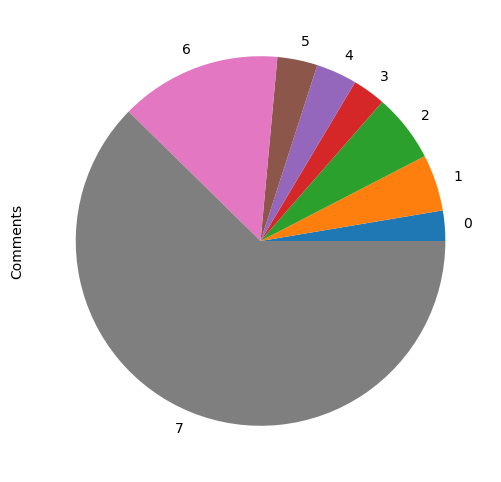

In [61]:
# visualize using PieChart
fig,axis=plt.subplots(figsize=(8,6))
clean_ta_en_misogyny_train.groupby('Label')['Comments'].count().plot.pie(ax=axis)

In [67]:
#Separate data into eight classes
class_0=clean_ta_en_misogyny_train[clean_ta_en_misogyny_train.Label==0]
class_1=clean_ta_en_misogyny_train[clean_ta_en_misogyny_train.Label==1]
class_2=clean_ta_en_misogyny_train[clean_ta_en_misogyny_train.Label==2]
class_3=clean_ta_en_misogyny_train[clean_ta_en_misogyny_train.Label==3]
class_4=clean_ta_en_misogyny_train[clean_ta_en_misogyny_train.Label==4]
class_5=clean_ta_en_misogyny_train[clean_ta_en_misogyny_train.Label==5]
class_6=clean_ta_en_misogyny_train[clean_ta_en_misogyny_train.Label==6]
class_7=clean_ta_en_misogyny_train[clean_ta_en_misogyny_train.Label==7]

In [63]:
from sklearn.utils import resample

In [68]:
#Determine the class with most samle
majority_class_samples=max(len(class_0),len(class_1), len(class_2),len(class_3),len(class_4),len(class_5),len(class_6),len(class_7))

In [69]:
#Upsample minority classes
class_0_upsample=resample(class_0, replace=True, n_samples=majority_class_samples, random_state=42)
class_1_upsample=resample(class_1, replace=True, n_samples=majority_class_samples, random_state=42)
class_2_upsample=resample(class_2, replace=True, n_samples=majority_class_samples, random_state=42)
class_3_upsample=resample(class_3, replace=True, n_samples=majority_class_samples, random_state=42)
class_4_upsample=resample(class_4, replace=True, n_samples=majority_class_samples, random_state=42)
class_5_upsample=resample(class_5, replace=True, n_samples=majority_class_samples, random_state=42)
class_6_upsample=resample(class_6, replace=True, n_samples=majority_class_samples, random_state=42)
class_7_upsample=resample(class_7, replace=True, n_samples=majority_class_samples, random_state=42)

In [71]:
#combine upsample classes
balanced_data=pd.concat([class_0_upsample,class_1_upsample,class_2_upsample,class_3_upsample,class_4_upsample,class_5_upsample,class_6_upsample,class_7_upsample])

In [72]:
#Save balanced data to CSV
balanced_data.to_csv('./train/balanced-clean-ta-en-misogyny-train.csv', index=False)

In [73]:
balanced_clean_ta_en_misogyny_train= pd.read_csv('./train/balanced-clean-ta-en-misogyny-train.csv')#, encoding='ISO-8859-1')
balanced_clean_ta_en_misogyny_train.head(5)

Comments  Label
0   smart subash evangala mari alunga ulagathaya ...      0
1   ne solrathu correct than avanga enna sonalum ...      0
2   yaa muthavi unna patha pombala mari illa amba...      0
3   advice lam nallan tan eruku  appe un magalai ...      0
4                                                ...      0

<Axes: ylabel='Comments'>

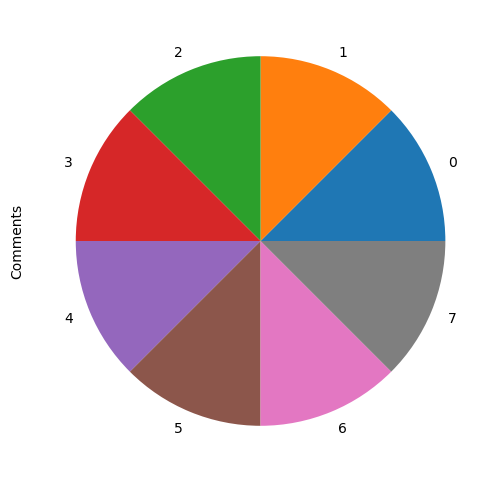

In [74]:
# visualize using PieChart
fig,axis=plt.subplots(figsize=(8,6))
balanced_clean_ta_en_misogyny_train.groupby('Label')['Comments'].count().plot.pie(ax=axis)

###### Balanced Data for clean-ta-misogyny-train.csv

In [76]:
clean_ta_misogyny_train= pd.read_csv('./train/clean-ta-misogyny-train.csv')#, encoding='ISO-8859-1')
clean_ta_misogyny_train.head(5)

Comments  Label
0  \tроЙроЩрпНроХро│рпН рокрпЗроЪрпНроЪрпИ роОродро┐ро░рпНрокро╛ро░рпНродрпНродрпЗройрпН роиро▓рпНро▓ ро╡ро┐ро│роХрпНроХроорпН ...      4
1  \tроОроЪрпН ро░ро╛роЪро╛ро╡ро╛ро▓рпН роЗро░ро╛рооро░рпБроХрпНроХрпЗ  роЗро┤ро┐ро╡рпБ роЗро╡ро░рпН роОро▓рпНро▓ро╛роорпН ...      7
2  \tроХро▓рпНропро╛рогроорпНройрпБ  ро╡ро░рпБроорпНрокрпЛродрпБ родро╛ройрпН роЪро╛родро┐ роорпБроХрпНроХро┐ропроорпН роОроЩ...      7
3                \ttentu kottai роРропро╛ роиро╛ройрпН родрооро┐ро┤рпН роЗроирпНродрпБ      7
4  \ttamil selvan  роЕроЯрпЗ родрпЗро╡роЯро┐ропро╛ро╡рпБроХрпНроХрпБ рокро┐ро░роирпНродро╡ройрпЗ рокроЪ...      3

<Axes: ylabel='Comments'>

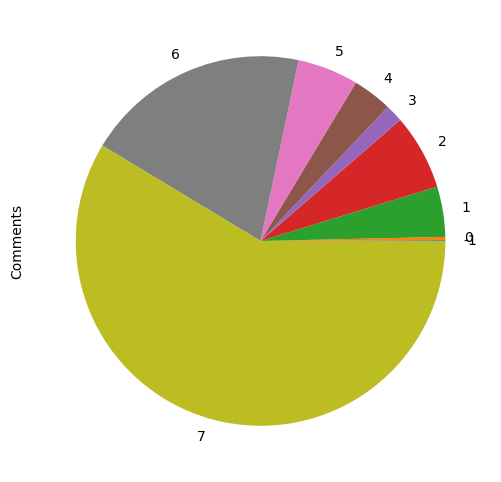

In [77]:
# visualize using PieChart
fig,axis=plt.subplots(figsize=(8,6))
clean_ta_misogyny_train.groupby('Label')['Comments'].count().plot.pie(ax=axis)

In [78]:
#Separate data into eight classes
class_0=clean_ta_misogyny_train[clean_ta_misogyny_train.Label==0]
class_1=clean_ta_misogyny_train[clean_ta_misogyny_train.Label==1]
class_2=clean_ta_misogyny_train[clean_ta_misogyny_train.Label==2]
class_3=clean_ta_misogyny_train[clean_ta_misogyny_train.Label==3]
class_4=clean_ta_misogyny_train[clean_ta_misogyny_train.Label==4]
class_5=clean_ta_misogyny_train[clean_ta_misogyny_train.Label==5]
class_6=clean_ta_misogyny_train[clean_ta_misogyny_train.Label==6]
class_7=clean_ta_misogyny_train[clean_ta_misogyny_train.Label==7]

In [79]:
#Determine the class with most samle
majority_class_samples=max(len(class_0),len(class_1), len(class_2),len(class_3),len(class_4),len(class_5),len(class_6),len(class_7))

In [80]:
#combine upsample classes
balanced_data_ta_misogyny_train=pd.concat([class_0_upsample,class_1_upsample,class_2_upsample,class_3_upsample,class_4_upsample,class_5_upsample,class_6_upsample,class_7_upsample])

In [82]:
#Save balanced data to CSV
balanced_data.to_csv('./train/balanced-clean-ta-misogyny-train.csv', index=False)

In [83]:
balanced_clean_ta_misogyny_train= pd.read_csv('./train/balanced-clean-ta-misogyny-train.csv')#, encoding='ISO-8859-1')
balanced_clean_ta_misogyny_train.head(5)

Comments  Label
0   smart subash evangala mari alunga ulagathaya ...      0
1   ne solrathu correct than avanga enna sonalum ...      0
2   yaa muthavi unna patha pombala mari illa amba...      0
3   advice lam nallan tan eruku  appe un magalai ...      0
4                                                ...      0

<Axes: ylabel='Comments'>

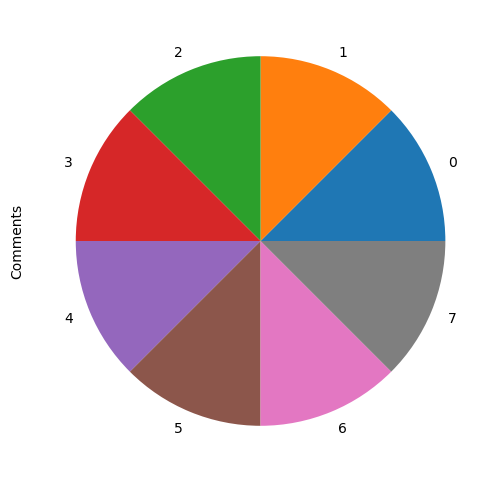

In [84]:
# visualize using PieChart
fig,axis=plt.subplots(figsize=(8,6))
balanced_clean_ta_misogyny_train.groupby('Label')['Comments'].count().plot.pie(ax=axis)

In [85]:
clean_telugu_hate_speech_train= pd.read_csv('./train/clean-telugu-hate-speech-train.csv')#, encoding='ISO-8859-1')
clean_telugu_hate_speech_train.head(5)

Comments  Label
0  thappu chesina vaallaku vanike kaadu inka anni...      1
1  dhusta chaathuryam  meeru ilantivi enni chesin...      1
2  vetakaram super govt ki siggu seram radu enduk...      1
3  only rajakiyam ga vadukovatanike ee dharidrapu...      1
4         katam hogaya narayana pedda bokada college      1

<Axes: ylabel='Comments'>

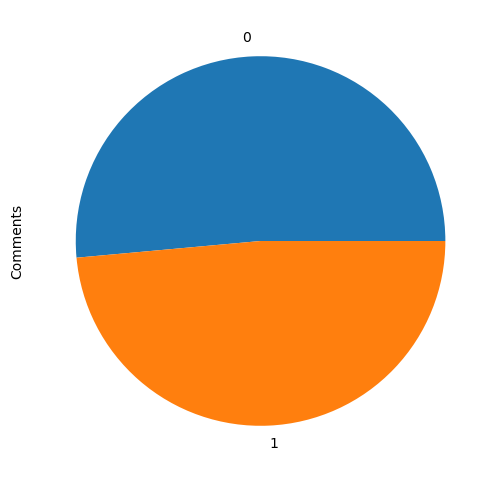

In [86]:
# visualize using PieChart
fig,axis=plt.subplots(figsize=(8,6))
clean_telugu_hate_speech_train.groupby('Label')['Comments'].count().plot.pie(ax=axis)

In [ ]:
#Separate data into eight classes
class_0=clean_telugu_hate_speech_train[clean_telugu_hate_speech_train.Label==0]
class_1=clean_telugu_hate_speech_train[clean_telugu_hate_speech_train.Label==1]

In [87]:
#Determine the class with most samle
majority_class_samples=max(len(class_0),len(class_1))

In [89]:
#combine upsample classes
balanced_clean_telugu_hate_speech_train=pd.concat([class_0_upsample,class_1_upsample])

In [90]:
#Save balanced data to CSV
balanced_clean_telugu_hate_speech_train.to_csv('./train/balanced-clean-telugu-hate-speech-train.csv', index=False)

In [91]:
balanced_clean_telugu_hate_speech_train= pd.read_csv('./train/balanced-clean-telugu-hate-speech-train.csv')#, encoding='ISO-8859-1')
balanced_clean_telugu_hate_speech_train.head(5)

Comments  Label
0   smart subash evangala mari alunga ulagathaya ...      0
1   ne solrathu correct than avanga enna sonalum ...      0
2   yaa muthavi unna patha pombala mari illa amba...      0
3   advice lam nallan tan eruku  appe un magalai ...      0
4                                                ...      0

<Axes: ylabel='Comments'>

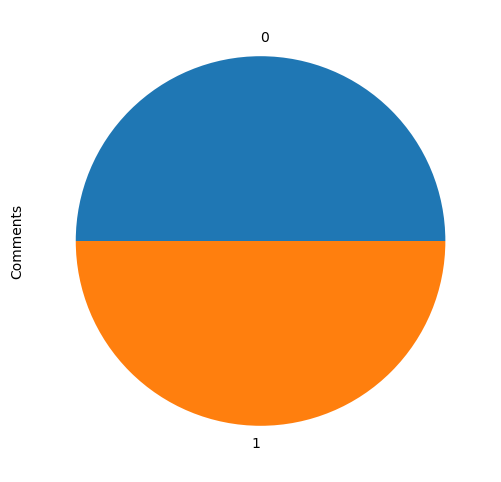

In [92]:
# visualize using PieChart
fig,axis=plt.subplots(figsize=(8,6))
balanced_clean_telugu_hate_speech_train.groupby('Label')['Comments'].count().plot.pie(ax=axis)